## DEG scoring (Figure 3D-G)

#### Import libraries

In [1]:
library(Seurat)
library(dplyr)
library(magrittr)
library(xlsx)
library(ggplot2)
library(ggrepel)
library(ggpubr)
library(reshape2)
library(scales)

Attaching SeuratObject


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




#### Load in data

In [2]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

#### Rename clusters with cell type identities

In [3]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [4]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [5]:
DefaultAssay(LS.integrated) <- 'RNA'

In [6]:
LS.integrated <- NormalizeData(LS.integrated, assay='RNA')

#### Identify DEGs in each cell cluster

Limiting the number of cells sampled from each cell cluster to reduce the likelihood that more DEGs will be discovered in cell clusters with more cells

In [ ]:
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")

In [ ]:
LS.integrated@meta.data$celltype.stim <- paste0(Idents(LS.integrated), "_", LS.integrated@meta.data$stim)
LS.integrated[["celltype"]] <- Idents(object = LS.integrated)
Idents(LS.integrated = LS.integrated) <- LS.integrated@meta.data$celltype.stim

saline versus chronic morphine

In [ ]:
for (i in 1:length(Cell_type)){
    one.markers <- FindMarkers(assay="RNA",slot='data',LS.integrated, , ident.1 = paste(Cell_type[i],"_LS_sal",sep=""), ident.2 =paste(Cell_type[i],"_LS_mor",sep=""), grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0.1,min.pct = 0,min.cells.gene = 3, min.cells.group = 1, max.cells.per.ident = 100)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,p_val_adjust<0.05 & pct.1>0.01),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_limit100/sal_over_mor/",Cell_type[i],"_gene_adjust_all.xlsx",sep="")))}

saline versus naloxone (chronic morphine + naloxone)

In [ ]:
for (i in 1:length(Cell_type)){
    one.markers <- FindMarkers(assay="RNA",LS.integrated, ident.1 = paste(Cell_type[i],"_LS_sal",sep=""), ident.2 =paste(Cell_type[i],"_LS_nal",sep=""), grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0.1,min.pct = 0,min.cells.gene = 3, min.cells.group = 1, max.cells.per.ident = 100)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,p_val_adjust<0.05 & pct.1>0.01),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_limit100/sal_over_nal/",Cell_type[i],"_gene_adjust_all.xlsx",sep="")))}

chronic morphine versus naloxone

In [ ]:
for (i in 1:length(Cell_type)){
    one.markers <- FindMarkers(assay="RNA",LS.integrated, ident.1 = paste(Cell_type[i],"_LS_mor",sep=""), ident.2 =paste(Cell_type[i],"_LS_nal",sep=""), grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0.1,min.pct = 0,min.cells.gene = 3, min.cells.group = 1, max.cells.per.ident = 100)

one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,p_val_adjust<0.05 & pct.1>0.01),file=(paste("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_limit_Venn/mor_over_nal/",Cell_type[i],"_gene_adjust_all.xlsx",sep="")))}

#### Computing a DEG score for each cell type and condition

Reload data

In [ ]:
LS.integrated<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_integrated.rds")
LS_sal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_sal.rds")
LS_mor<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_mor.rds")
LS_nal<-readRDS(file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal.rds")
LS_one_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_one_mor.rds")
LS_nal_no_mor<-readRDS( file = "C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/LS_nal_no_mor.rds")

In [ ]:
new.ident <- c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")
names(x = new.ident) <- levels(x =LS.integrated)
LS.integrated<- RenameIdents(object =LS.integrated, new.ident)

In [ ]:
for (i in 1:length(new.ident)){
assign(paste(new.ident[i],"_barcode",sep=""),colnames(LS.integrated@assays$RNA@data[,which(Idents(object=LS.integrated) %in% new.ident[i])]))# this gives all barcodes in cluster
assign(paste(new.ident[i],"_barcode_LS_sal",sep=""),intersect(colnames(LS_sal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_mor",sep=""),intersect(colnames(LS_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal",sep=""),intersect(colnames(LS_nal@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_one_mor",sep=""),intersect(colnames(LS_one_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
assign(paste(new.ident[i],"_barcode_LS_nal_no_mor",sep=""),intersect(colnames(LS_nal_no_mor@assays$RNA@data),eval(parse(text = paste(new.ident[i],"_barcode",sep="")))))
}

In [ ]:
DefaultAssay(LS.integrated) <- 'RNA'

In [ ]:
LS.integrated <- NormalizeData(LS.integrated, assay='RNA')

saline versus chronic morphine

In [7]:
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")

In [8]:
setwd("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_limit100/sal_over_mor/")
lmor <- list() # creates a list

list_mor <- dir(pattern = "*.xlsx") # creates the list of all the csv files in the directory
for (k in 1:length(list_mor)){
 lmor[[k]] <- read.xlsx(list_mor[k], sheetIndex=1)$NA.
}
str(lmor[[1]]) 

cluster_order <- gsub('_gene_adjust_all.xlsx','',list_mor)
t1 <- lapply(lmor, unlist)
t2 <- lapply(t1, length)
mor.df <- data.frame(cluster_order, unlist(t2))

 chr [1:431] "Ly6h" "Ckb" "Ubb" "Matk" "Actb" "Snhg11" "Acp1" "Tmsb4x" ...


saline versus naloxone

In [9]:
setwd("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_limit100/sal_over_nal/")
lnal_sal <- list() # creates a list

list_nal_sal <- dir(pattern = "*.xlsx") # creates the list of all the csv files in the directory
for (k in 1:length(list_nal_sal)){
 lnal_sal[[k]] <- read.xlsx(list_nal_sal[k], sheetIndex=1)$NA.
}
str(lnal_sal[[1]]) 

cluster_order <- gsub('_gene_adjust_all.xlsx','',list_nal_sal)
t1 <- lapply(lnal_sal, unlist)
t2 <- lapply(t1, length)
nal_sal.df <- data.frame(cluster_order, unlist(t2))

 chr [1:162] "Ly6h" "Snhg11" "Matk" "Ckb" "Tmem191c" "Actb" "Ubb" "Gm47283" ...


morphine versus naloxone

In [10]:
setwd("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_limit100/mor_over_nal/")
lnal <- list() # creates a list

list_nal <- dir(pattern = "*.xlsx") # creates the list of all the csv files in the directory
for (k in 1:length(list_nal)){
 lnal[[k]] <- read.xlsx(list_nal[k], sheetIndex=1)$NA.
}
str(lnal[[1]]) 

cluster_order <- gsub('_gene_adjust_all.xlsx','',list_nal)
t1 <- lapply(lnal, unlist)
t2 <- lapply(t1, length)
nal.df <- data.frame(cluster_order, unlist(t2))

 chr [1:30] "Gria4" "Slc35f1" "Srsf7" "Ext1" "Adcy8" "Sltm" "Lrfn5" "Ssbp4" ...


Check if DEG scores are correlated with the number of cells in each group

In [11]:
cor.df <- cbind(mor.df, nal.df[2])

cor.df<-cor.df[-c(15),]

cell.no <- data.frame(table(Idents(LS.integrated)))

cor.df <- cor.df[match(Cell_type, cor.df$cluster_order),]

cor.df<-cbind(cor.df, cell.no$Freq)

colnames(cor.df) <- c('celltype','mor','nal','freq')

`geom_smooth()` using formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



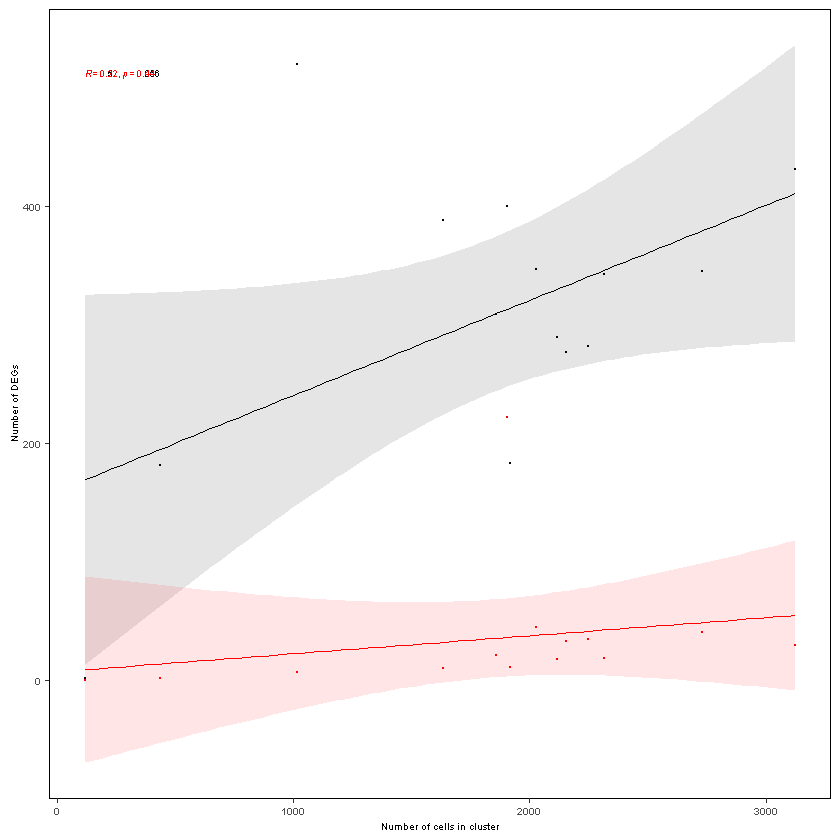

In [12]:
ggplot(cor.df, aes(x=freq, y=mor))+
geom_point(data=cor.df, aes(x=freq, y=mor),size=0.3, color='black') +
geom_point(data=cor.df, aes(x=freq, y=nal),size=0.3, color='red') +
    theme_classic() + 
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
geom_smooth(data=cor.df, aes(x=freq, y=mor), method='lm', color="black", fill="black", alpha=0.1, size=0.5) +
stat_cor(data=cor.df, aes(x=freq, y=mor), size=2, label.sep=", ")+
geom_smooth(data=cor.df, aes(x=freq, y=nal), method='lm', color="red", fill="red", alpha=0.1, size=0.5) +
stat_cor(data=cor.df, aes(x=freq, y=nal), size=2, label.sep=", ", color='red')+
ylab("Number of DEGs") +
xlab("Number of cells in cluster")

Plotting DEG enrichment scores

In [13]:
DEGs <- cbind(mor.df, nal_sal.df[2], nal.df[2])
DEGs

cluster_order,unlist.t2.,unlist.t2.,unlist.t2.
<chr>,<int>,<int>,<int>
Gaba1,431,162,30
Gaba10,388,138,10
Gaba11,181,154,2
Gaba12,2,2,0
Gaba2,345,118,41
Gaba3,342,128,19
Gaba4,282,99,35
Gaba5,277,124,33
Gaba6,289,83,18


In [14]:
DEGs <- cbind(mor.df, nal_sal.df[2], nal.df[2])

normalize <- function(x){
 (x-min(x)) / (max(x)-min(x))
    }

DEGs[2:4] <- apply(DEGs[2:4], MARGIN=2, FUN=normalize) 

DEGs$cluster_order <- factor(DEGs$cluster_order, levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

colnames(DEGs) <- c('Celltype','Mor','Nal','Nal2')

DEG.df <- melt(DEGs)

DEG.df$variable <- factor(DEG.df$variable, levels=rev(c('Mor','Nal','Nal2')))

Using Celltype as id variables



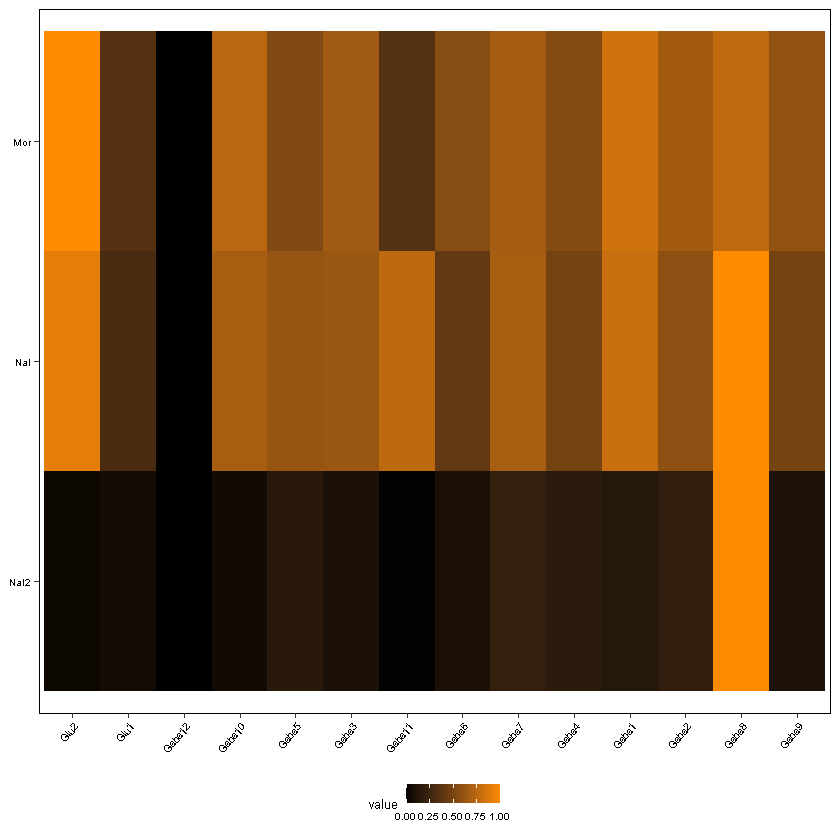

In [15]:
ggplot(DEG.df, aes(Celltype,variable)) + 
geom_tile(aes(fill =value))+ 
scale_fill_gradient(low = "black",high = "darkorange",oob=squish)+
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(color = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')

Because the DEG scores for the mor vs nal comparison are highly correlated with the number of cells in each cluster, we will have to devise a different strategy for this comparison

#### Computing a DEG score for each condition comparison (100 restarts)


We will define the DEG enrichment score as the number of DEGs that are either up- or downregulated between each condition and within each celltype. To do this, we must randomly sample a certain number of cells per cluster / per group to perform the calculation 100x (more is better). From here, we can simply take the average DEG number. If were were to use all cells in each cluster, the number of DEGs would be highly correlated with the # of cells in that cluster, and if we were to sample, say, ~100 cells per cluster only once, we could stochastically extract cells that happen to be higher or lower than the median of the population.

In [ ]:
#set the seed for the entire session
set.seed(1027)

In [ ]:
#Create list of seeds through which to iterate
seed_list <- sample(1:1000, 100, replace=FALSE)

In [ ]:
#creating a df that will contain frequency information for every gene that appears in the DEG discovery
#gene.df <- data.frame(rownames(LS.integrated@assays$RNA@data))

In [ ]:
#Define list of cell types of interest
Cell_type<-c("Gaba1","Gaba2","Gaba3","Gaba4","Gaba5","Gaba6","Gaba7","Glu1","Gaba8","Gaba9","Gaba10","Glu2","Gaba11","Gaba12")

In [ ]:
LS.integrated@meta.data$celltype.stim <- paste0(Idents(LS.integrated), "_", LS.integrated@meta.data$stim)
LS.integrated[["celltype"]] <- Idents(object = LS.integrated)
Idents(LS.integrated = LS.integrated) <- LS.integrated@meta.data$celltype.stim

Morphine versus naloxone

In [ ]:
deg.list <- vector()
deg.df <- data.frame(Cell_type)
deg.meta <- data.frame('p_val','avg_log2FC','pct.1','pct.2','p_val_adj','cell_type','seed')
colnames(deg.meta) <- c('p_val','avg_log2FC','pct.1','pct.2','p_val_adj','cell_type','seed')
deg.meta <- deg.meta[-1,]

for (seed in seed_list){
    #iterates through seed list
    set.seed(seed)
    
    #iterates through list of cell types
    for (i in 1:length(Cell_type)){
        deg <- FindMarkers(assay="RNA",slot='data',LS.integrated, , ident.1 = paste(Cell_type[i],"_LS_mor",sep=""), ident.2 =paste(Cell_type[i],"_LS_nal",sep=""), grouping.var = "stim",print.bar = FALSE,
                        logfc.threshold = 0.1,min.pct = 0,min.cells.gene = 3, min.cells.group = 1, max.cells.per.ident = 100, random.seed=seed) #100 was chosen as the sample size due to how small Gaba12 is
        deg.sub <- subset(deg,p_val_adj <0.05)
        deg.count <- length(rownames(deg.sub))
        if (deg.count > 0){ 
            deg.sub$cell_type <- Cell_type[i]
            deg.sub$gene <- rownames(deg.sub)
            deg.sub$seed <- seed
            deg.meta <- rbind(deg.meta, deg.sub)
        }
        deg.list[i] <- deg.count
        message(Cell_type[i])
    }
    
    deg.df <- cbind(deg.df,deg.list)
    deg.list <- vector()
    message(which(seed_list == seed))               
}

#write.xlsx2(deg.meta, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_100-restarts/mor_over_nal/deg_df_mor_over_nal.xlsx")


In [ ]:
deg.meta

In [ ]:
deg.df

In [ ]:
saveRDS(deg.df, file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_100-restarts/deg_count_df_mor_over_nal.rds")

#### Plotting distribution of DEGs over runs

In [16]:
x <-readRDS(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_100-restarts/mor_over_nal/deg_count_df_mor_over_nal.rds")

In [17]:
#Gaba8
a <- data.frame(as.numeric(x[9,2:101]))
colnames(a) <- 'a'
#Gaba7
b <- data.frame(as.numeric(x[7,2:101]))
colnames(b) <- 'b'
#Glu2
c <- data.frame(as.numeric(x[1,2:101]))
colnames(c) <- 'c'

In [18]:
p <- ggplot() + geom_histogram(data=a, aes(x=a), fill='black',alpha=0.5,binwidth=2) + geom_histogram(data=b, aes(x=b), fill='orange',alpha=0.5,binwidth=2) + geom_histogram(data=c, aes(x=c), fill='blue',alpha=0.5,binwidth=2)  + theme_classic()

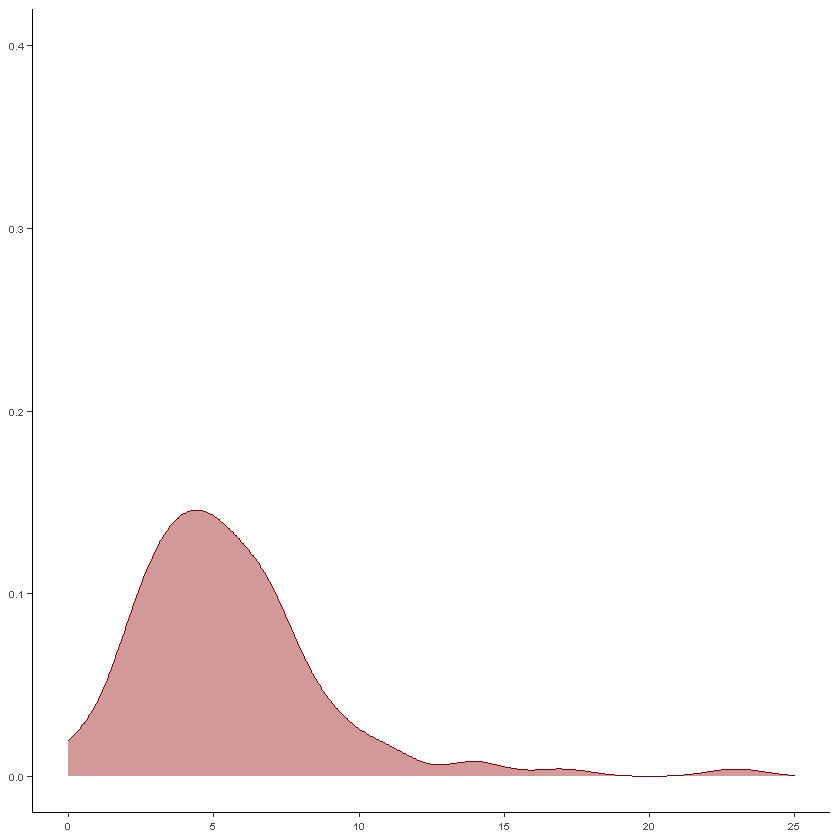

In [19]:
p <- ggplot(data=a, aes(x=a), fill='black',alpha=0.5) + 
    geom_density(color = "darkred",fill='darkred', alpha=0.4, size = 0.5, bw=1)  + 
    theme_classic() + 
    theme(axis.title=element_blank(),
         plot.title=element_blank(),
         axis.text.y = element_text(size=6),
         axis.text.x = element_text(size=6),
         axis.ticks = element_line(size=0.25),
         axis.line = element_line(size=0.25)) +
    xlim(0,25) + ylim(0,0.4) + ggtitle('Gaba8')
p

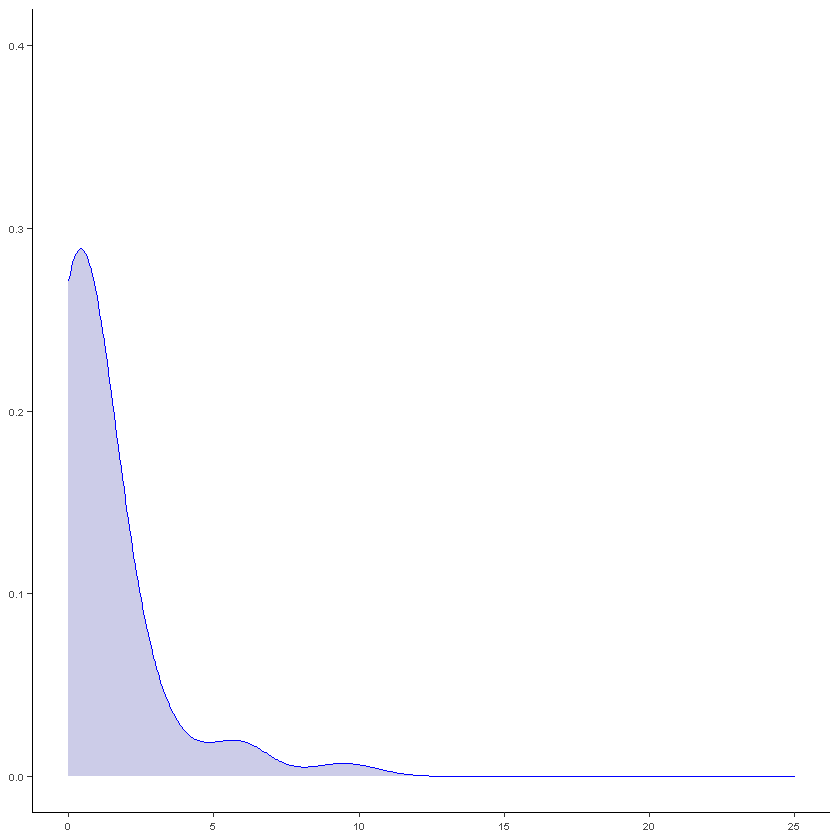

In [20]:
p <- ggplot(data=b, aes(x=b)) + 
    geom_density(color = "blue",fill='darkblue', alpha=0.2, size = 0.5, bw=1)  + 
    theme_classic() + 
    theme(axis.title=element_blank(),
         plot.title=element_blank(),
         axis.text.y = element_text(size=6),
         axis.text.x = element_text(size=6),
         axis.ticks = element_line(size=0.25),
         axis.line = element_line(size=0.25)) +
    xlim(0,25) + ylim(0,0.4) + ggtitle('Gaba7')
p

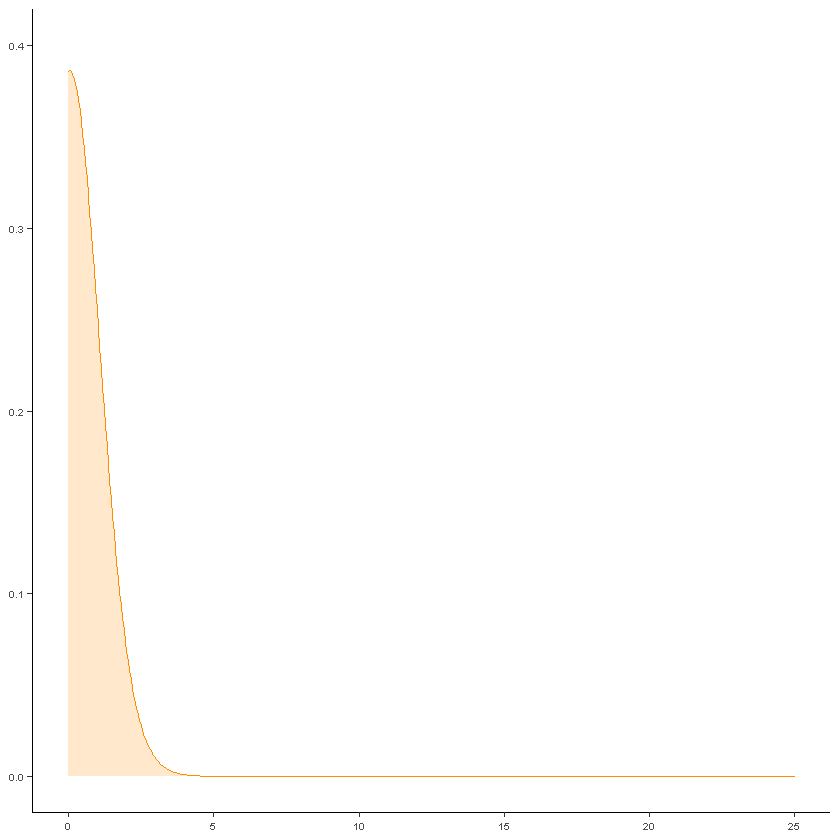

In [21]:
p <- ggplot(data=c, aes(x=c)) + 
    geom_density(color = "darkorange",fill='darkorange', alpha=0.2, size = 0.5, bw=1)  + 
    theme_classic() + 
    theme(axis.title=element_blank(),
         plot.title=element_blank(),
         axis.text.y = element_text(size=6),
         axis.text.x = element_text(size=6),
         axis.ticks = element_line(size=0.25),
         axis.line = element_line(size=0.25)) +
    xlim(0,25) + ylim(0,0.4) + ggtitle('Gaba1')
p

#### New DEG enrichment score plot for mor vs nal

In [22]:
deg.df<-readRDS(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_100-restarts/mor_over_nal/deg_count_df_mor_over_nal.rds")

In [23]:
#correlation between DEGs and number of cells in each cluster
deg <- data.frame(rowMeans(deg.df[,2:101]))

freq <- data.frame(table(Idents(LS.integrated)))
df <- cbind(freq, deg)
colnames(df) <- c('cell_type','Freq','deg')

cor(df$Freq, df$deg)

[1] 0.03220143

Plotting

In [24]:
df$variable <- 1

In [25]:
df$cell_type <- factor(df$cell_type, levels=c("Glu2","Glu1","Gaba12","Gaba10","Gaba5","Gaba3","Gaba11","Gaba6","Gaba7","Gaba4","Gaba1","Gaba2","Gaba8","Gaba9"))

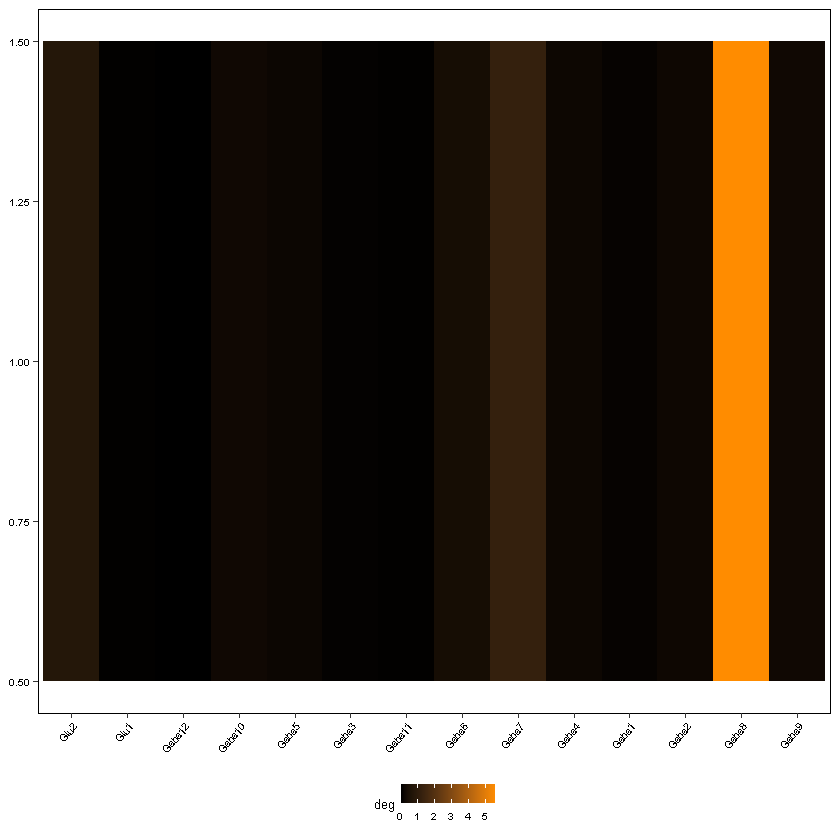

In [26]:
ggplot(df, aes(cell_type,variable)) + 
geom_tile(aes(fill = deg))+ 
scale_fill_gradient(low = "black",high = "darkorange",oob=squish)+
theme_classic()+
    theme(axis.title=element_blank(),
          axis.text.y=element_text(size=6,colour = "black"),
          axis.text.x=element_text(size=6,angle = 50, hjust =1,colour = "black"),
          axis.line = element_blank(),
          axis.ticks = element_line(size=0.25),
          legend.key.size = unit(0.4, "cm"),
          panel.background = element_rect(color = "black", size=.25, fill=NA),
          legend.title = element_text(size=8),
          legend.text = element_text(size=6),
          legend.position='bottom')

#### Gene correlation with DEG enrichment score

In [27]:
normalize <- function(x){
 (x-min(x)) / (max(x)-min(x))
    }

In [28]:
deg.df<-readRDS(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/DEG/Independent_100-restarts/mor_over_nal/deg_count_df_mor_over_nal.rds")

In [29]:
df.mean <- data.frame(normalize(rowMeans(deg.df[,2:101])))

#subsetting the cells that are in the chronic morphine group only
#We decided to use this group as a sort of "baseline" for the expression that may be predictive for Nal-induced DEG enrichment
LS.sub <- subset(LS.integrated, cells = colnames(LS_mor))

For oprm1

In [30]:
oprm1 <- DotPlot(LS.sub, feature='Oprm1',scale=FALSE)$data$avg.exp
oprm1 <- normalize(expm1(oprm1))

In [31]:
library(ggpubr)

,oprm1
normalize.rowMeans.deg.df...2.101...,-0.06153202


`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



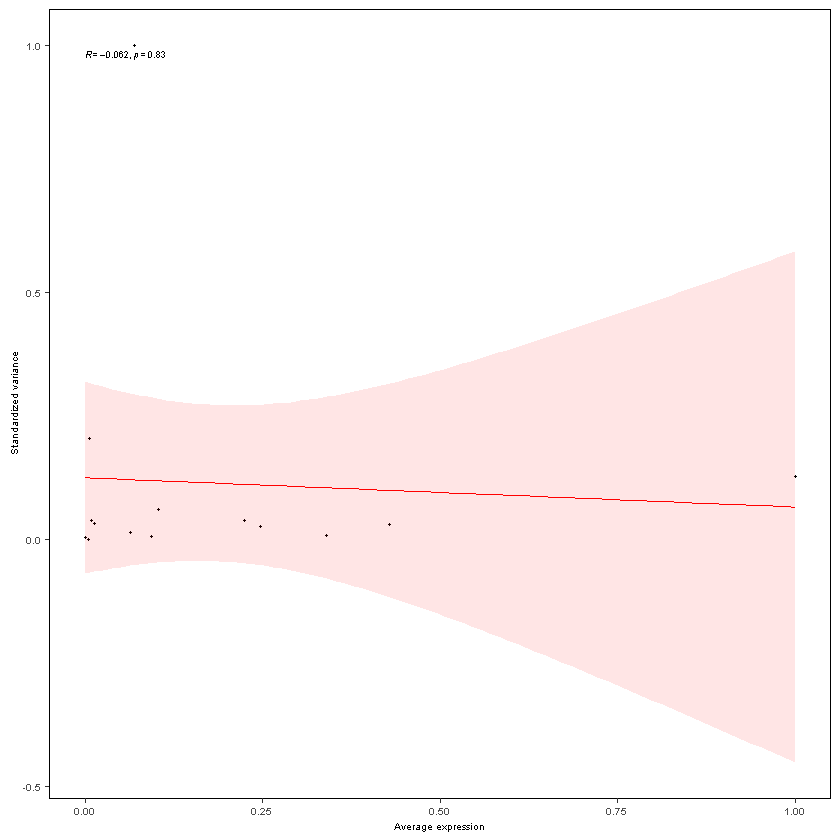

In [32]:
cor.df <- cbind(df.mean, oprm1)
#cor.df<-cor.df[-9,] #remove Gaba8
cor(cor.df[1], cor.df[2])
colnames(cor.df) <- c('deg','exp')

ggplot(cor.df, aes(x=exp, y=deg)) +
    geom_point(size=0.5) +
    theme_classic() +
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    scale_color_manual(values=c('black','red')) +
    NoLegend() +
    xlab("Average expression") + 
    ylab("Standardized variance") +
    stat_cor(size=2, label.sep=", ") +
    geom_smooth(method='lm', color="red", fill="red", alpha=0.1, size=0.5)
ggsave('oprm1_deg.pdf')

For nts

In [44]:
nts <- DotPlot(LS.sub, feature='Nts',scale=FALSE)$data$avg.exp
nts <- normalize(expm1(nts))

,nts
normalize.rowMeans.deg.df...2.101...,0.9901819


`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



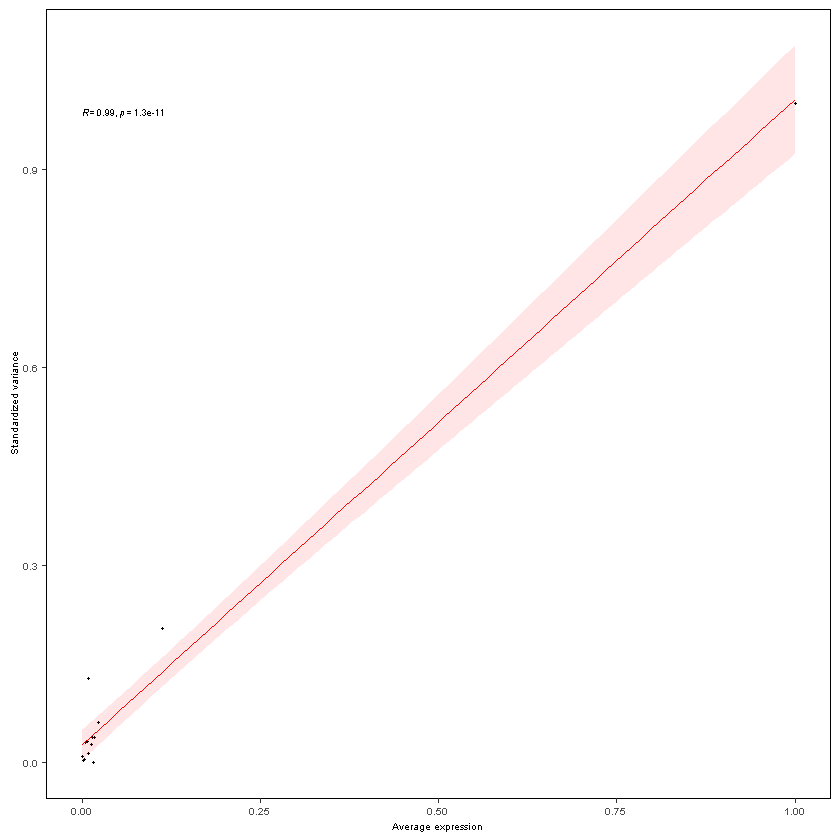

In [45]:
# for nts
cor.df <- cbind(df.mean, nts)
#cor.df<-cor.df[-9,] #remove Gaba8
cor(cor.df[1], cor.df[2])
colnames(cor.df) <- c('deg','exp')

ggplot(cor.df, aes(x=exp, y=deg)) +
    geom_point(size=0.5) +
    theme_classic() +
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    scale_color_manual(values=c('black','red')) +
    NoLegend() +
    xlab("Average expression") + 
    ylab("Standardized variance") +
    stat_cor(size=2, label.sep=", ") +
    geom_smooth(method='lm', color="red", fill="red", alpha=0.1, size=0.5)
ggsave('nts_deg.pdf')

,nts
normalize.rowMeans.deg.df...2.101...,0.8323612


`geom_smooth()` using formula 'y ~ x'

Saving 6.67 x 6.67 in image

`geom_smooth()` using formula 'y ~ x'



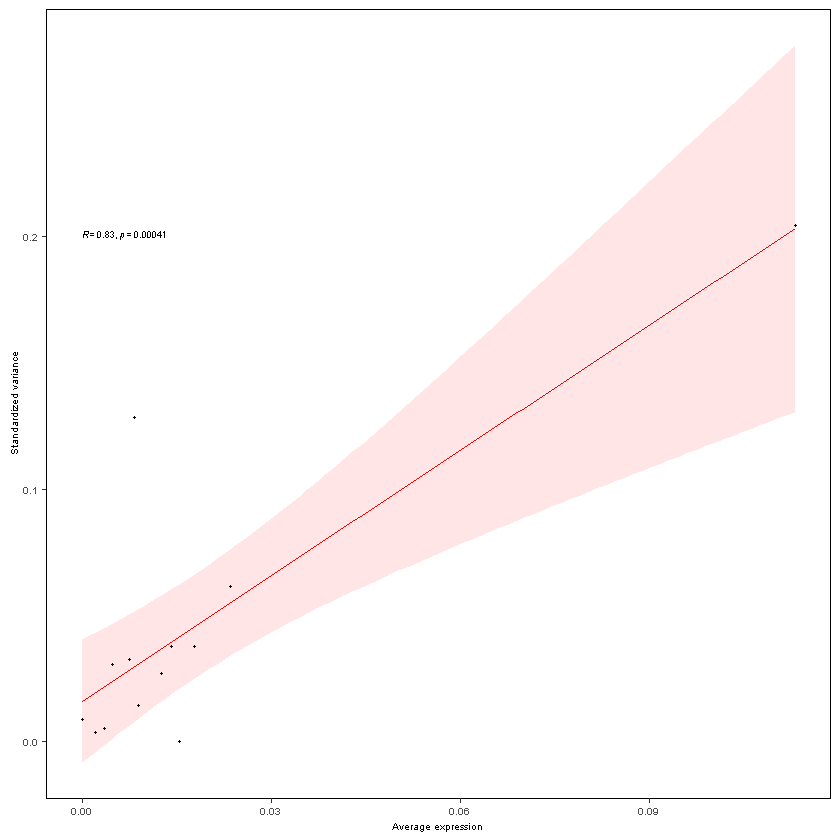

In [35]:
# for nts
cor.df <- cbind(df.mean, nts)
cor.df<-cor.df[-9,] #remove Gaba8
cor(cor.df[1], cor.df[2])
colnames(cor.df) <- c('deg','exp')

ggplot(cor.df, aes(x=exp, y=deg)) +
    geom_point(size=0.5) +
    theme_classic() +
    theme(axis.line = element_blank(), 
         plot.title=element_blank(),
         panel.background = element_rect(colour = "black", size=.25, fill=NA),
         axis.text = element_text(size=6),
         axis.title = element_text(size=6),
         axis.ticks = element_line(size=0.25)) +
    scale_color_manual(values=c('black','red')) +
    NoLegend() +
    xlab("Average expression") + 
    ylab("Standardized variance") +
    stat_cor(size=2, label.sep=", ") +
    geom_smooth(method='lm', color="red", fill="red", alpha=0.1, size=0.5)
ggsave('nts_deg_nogaba8.pdf')

In [46]:
cor.df

deg,exp
<dbl>,<dbl>
0.014466546,0.008995644
0.032549729,0.007520322
0.009041591,0.000000000
0.030741410,0.004813991
0.027124774,0.012573282
0.061482821,0.023485087
0.204339964,0.113133862
0.003616637,0.002038748
1.000000000,1.000000000


#### Identifying DEGs in Nts+ versus Nts- cells

In [ ]:
#only taking the saline (control) group for this analysis
LS.sub <- subset(LS.integrated, cells=colnames(LS_sal))

LS.nts <- subset(LS.sub, Nts > 0)
LS.other <- subset(LS.sub, Nts == 0)

assay.data<-data.frame(GetAssayData(LS.integrated, slot='data'))
assay.data <- assay.data[rownames(assay.data) %in% c('Nts','Drd2'),]

data.nts <- assay.data[colnames(assay.data) %in% colnames(LS.nts)]
data.other <- assay.data[colnames(assay.data) %in% colnames(LS.other)]

In [ ]:
celltype.stim<-numeric()
for (i in 1:dim(LS.integrated@meta.data)[1]){
    if(colnames(LS.integrated)[i] %in% colnames(LS.nts)){
        celltype.stim[i]<-paste(LS.integrated@meta.data$celltype[i],"_N")
    }else if (colnames(LS.integrated)[i] %in% colnames(LS.other)){
        celltype.stim[i]<-paste(LS.integrated@meta.data$celltype[i],"_O")
    }else{
        celltype.stim[i]<-paste(LS.integrated@meta.data$celltype[i],"_None")
    }
}

LS.integrated@meta.data$celltype.stim<-celltype.stim

LS.integrated[["celltype"]] <- Idents(object = LS.integrated)
Idents(LS.integrated = LS.integrated) <- LS.integrated@meta.data$celltype.stim

In [ ]:
one.markers <- FindMarkers(LS.integrated, assay='RNA', slot='data', ident.1 = " _N", ident.2 =" _O", grouping.var = "stim",print.bar = FALSE,logfc.threshold = 0,min.pct = 0,min.cells.gene = 3, min.cells.group = 1)
one.markers$p_val_adjust<-one.markers$p_val*(dim(one.markers)[1]:1)
sort_marker<-one.markers[order(-one.markers["avg_log2FC"]),]
write.xlsx2(subset(sort_marker,avg_log2FC>0.1 & p_val_adjust<0.05 & pct.1>0.01),file=(paste("RNA_Nts_genes_up_saline-group-only.xlsx",sep="")))
write.xlsx2(subset(sort_marker,avg_log2FC<0.1 & p_val_adjust<0.05 & pct.1>0.01),file=(paste("RNA_Nts_genes_down_saline-group-only.xlsx",sep="")))

#### Plotting molecular markers of NTS+ neurons

In [36]:
Nts_conserved<-read.xlsx("C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rv4/Neurons_only_iter2/conserved_markers/Nts_compared_to_neg/RNA_Nts_genes_up.xlsx",sheetIndex=1)

In [37]:
Nts_conserved$pct.change <- Nts_conserved$pct.1 - Nts_conserved$pct.2
df_sig <- subset(Nts_conserved, avg_log2FC > 0)

highlight <-vector(mode="numeric", length=0)
for (i in 1:dim(df_sig)[1]){
    if (df_sig$avg_log2FC[i] > 0.1 & df_sig$p_val_adj[i] < 0.05) {highlight[i] <- "Y"}
    else {highlight[i] <- "N"}
}
df_sig$highlight <-highlight

dim(df_sig)

df_sig$label <- NA
df_sig$label[df_sig$highlight == "Y"] <- as.character(df_sig$NA.[df_sig$highlight == "Y"])

df_sig$label <- NA
df_sig$label <- ifelse(df_sig$NA. %in% c('Erbb4','Gria3','Adra1a','Gnal','Lrrk2','Drd2','Grin2a'), df_sig$NA., NA)

df_sig <- df_sig[-1,]

[1] 3539    9

In [38]:
library(ggrepel)

Warning message:
"Removed 3531 rows containing missing values (geom_text_repel)."


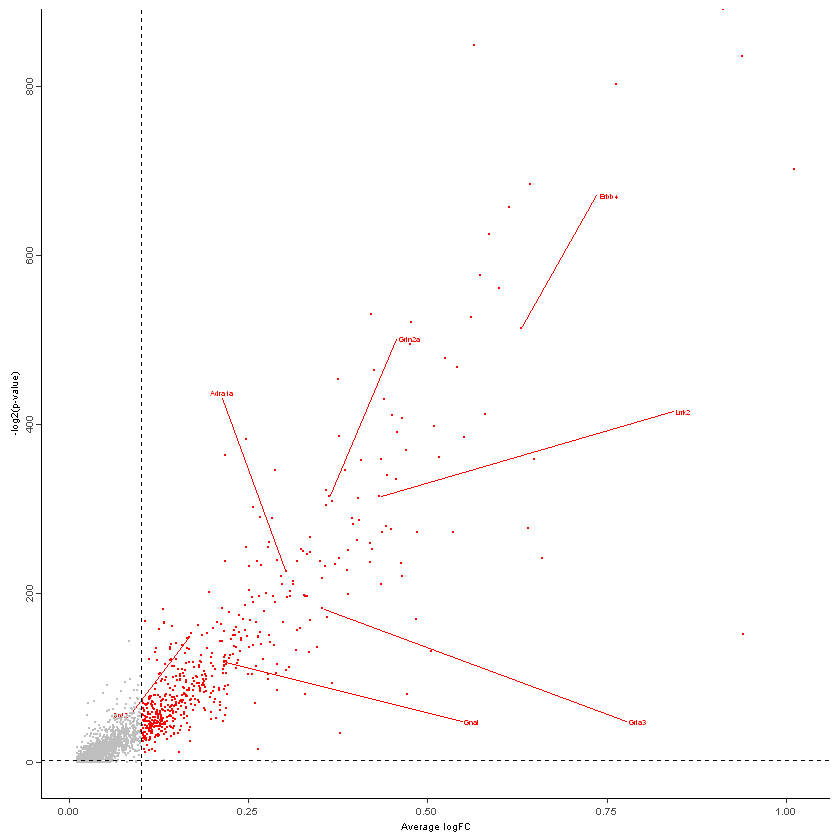

In [39]:
p <- ggplot(df_sig, aes(x=avg_log2FC, y= -log2(p_val_adj), col=highlight, label=label)) +
    ggtitle("Gaba9_conserved_markers") +
    geom_text_repel(size=1.5, segment.size=0.25, max.overlaps = Inf, box.padding = 3, force=1000, min.segment.length = 1) +
    geom_point(size=0.1) + 
    theme_classic() + 
    theme(axis.line=element_line(size=0.25),
         axis.ticks=element_line(size=0.25),
         axis.text=element_text(size=6),
         axis.title=element_text(size=6),
         axis.text.y=element_text(angle=90, hjust=.5),
         plot.title=element_blank())+
    geom_vline(xintercept=0.1, col="black", linetype="dashed", size=0.25) +
    geom_hline(yintercept=-log(0.05), col="black", linetype="dashed", size=0.25) +
    NoLegend()+
    scale_color_manual(values=c("gray","red")) +
    xlab('Average logFC')+
    ylab('-log2(p-value)') 
p

#### Gene ontology for Nts+ enriched genes

In [40]:
nts_bp <- read.table(file="C:/Users/stuberadmin/Documents/scRNAseq/211119-RS-rV4/Neurons_only_iter2/conserved_markers/Nts_compared_to_neg/GO_Biological_Process_2021_table.txt", header = TRUE, sep = "\t", quote = "\"",dec=".",fill=TRUE,comment.char="")

In [41]:
new.numb <- unlist(apply(nts_bp[2], 1, function(y) sub("/.*","",y)))
nts_bp$Overlap <- new.numb

terms <- nts_bp[1:10,]$Term
nts_bp <- nts_bp[nts_bp$Term %in% (terms),]
nts_bp$Term <- factor(nts_bp$Term, levels=rev(terms))

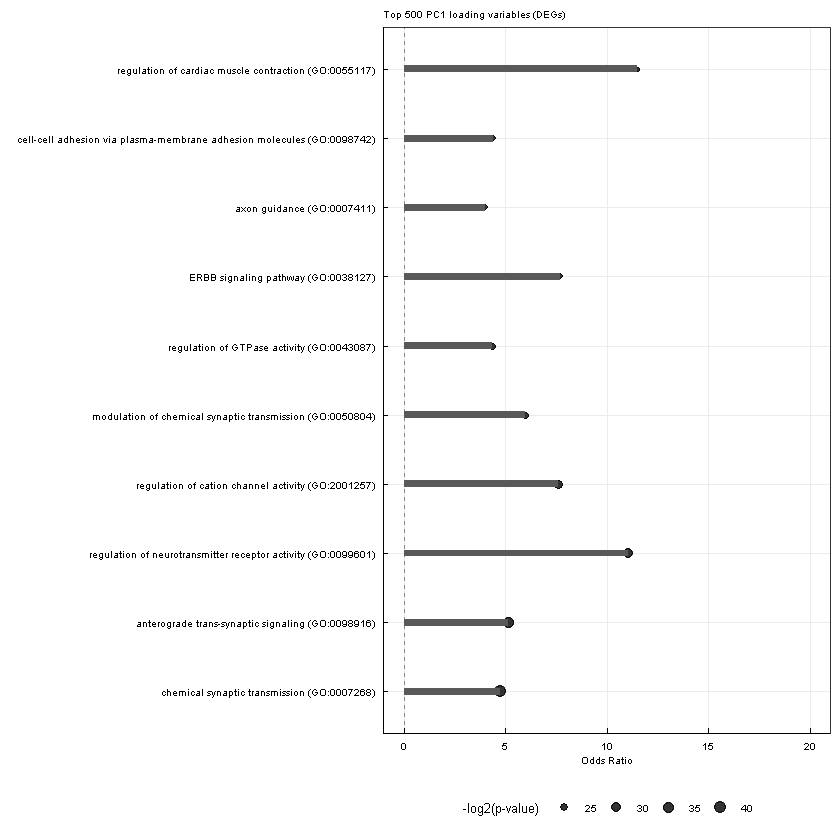

In [42]:
p <- ggplot(nts_bp, aes(x = Term, y= Odds.Ratio))+
geom_hline(yintercept = 0, linetype="dashed", color = "azure4", size=.25)+
geom_point (data=nts_bp,aes(x=Term, y=Odds.Ratio, size = as.numeric(-log2(P.value))), alpha=0.8)+
geom_bar(stat='identity',width=0.1)+
scale_size(range = c(1,3))+
scale_x_discrete(limits= terms)+
scale_y_continuous(limits=c(0,20))+
scale_color_gradient(low="green", high="red",limits=c(0, NA))+
coord_flip()+
theme_bw()+
theme(plot.title = element_text(size=6),
    axis.title.y = element_blank(),
    axis.title.x = element_text(size=6),
    axis.line=element_line(size=0.25),
    axis.ticks=element_line(size=0.25),
    axis.ticks.length=unit(-0.1, "cm"),
    axis.text.x = element_text(margin=margin(5,5,0,5,"pt"), size=6),
    axis.text.y = element_text(margin=margin(5,5,5,5,"pt"), size=6),
    axis.text = element_text(color = "black", size=6),
    panel.grid.minor = element_blank(),
    legend.position='bottomleft')+
    theme(legend.title = element_text(size = 8),
    legend.text = element_text(size = 6), 
    axis.ticks = element_line(colour = "black", size = .25),
     legend.position='bottom')+
ylab("Odds Ratio")+
ggtitle('Top 500 PC1 loading variables (DEGs)') +
labs(size="-log2(p-value)")
p